In [1]:
#install libraries

import pandas as pd

transactions = pd.read_csv(r"C:\Users\Shivi\Downloads\Retail_Data_Transactions.csv")

In [2]:
transactions

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
responses = pd.read_csv(r"C:\Users\Shivi\Downloads\Retail_Data_Response.csv")

In [4]:
responses

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [5]:
Retaildf = transactions.merge(responses,on='customer_id', how='left')

In [6]:
Retaildf

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
#data features

Retaildf.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [8]:
Retaildf.shape

(125000, 4)

In [9]:
Retaildf.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [10]:
Retaildf.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [11]:
Retaildf.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [12]:
Retaildf.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [13]:
Retaildf=Retaildf.dropna()

In [14]:
#changing datatypes

Retaildf['trans_date']=pd.to_datetime(Retaildf['trans_date'])
Retaildf['response'] = Retaildf['response'].astype('int64')

C:\Users\Shivi\AppData\Local\Temp\ipykernel_27404\552168714.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Retaildf['trans_date']=pd.to_datetime(Retaildf['trans_date'])
C:\Users\Shivi\AppData\Local\Temp\ipykernel_27404\552168714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retaildf['trans_date']=pd.to_datetime(Retaildf['trans_date'])
C:\Users\Shivi\AppData\Local\Temp\ipykernel_27404\552168714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [15]:
set(Retaildf['response'])

{0, 1}

In [16]:
#handling outliers

from scipy import stats
import numpy as np

In [17]:
#z-score
z_scores =np.abs(stats.zscore(Retaildf['tran_amount']))

threshold = 3

outliers = z_scores>threshold
outliers.sum()

0

In [18]:
z_scores =np.abs(stats.zscore(Retaildf['response']))

threshold = 3

outliers = z_scores>threshold
outliers.sum()

0

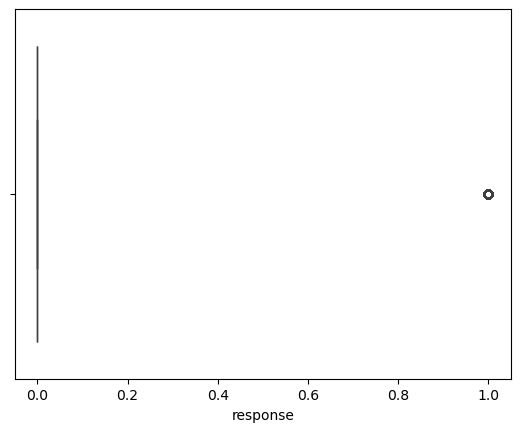

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=Retaildf['response'])
plt.show()

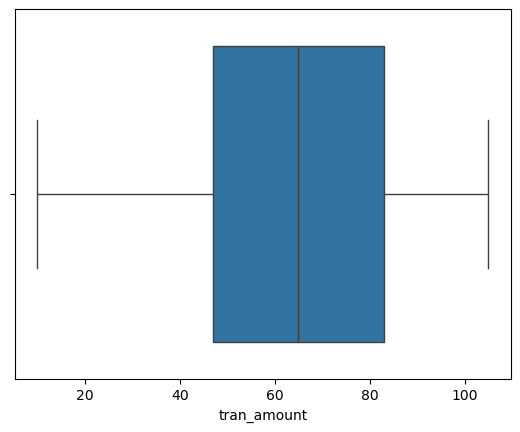

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=Retaildf['tran_amount'])
plt.show()

In [21]:
#creating new columns
Retaildf['month']=Retaildf['trans_date'].dt.month

C:\Users\Shivi\AppData\Local\Temp\ipykernel_27404\3661247415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retaildf['month']=Retaildf['trans_date'].dt.month


In [22]:
#which 3 months have had the highest transaction amounts?

monthly_sales = Retaildf.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index()

In [23]:
monthly_sales.head(3)

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [24]:
#top 5 customers having highest no. of orders

order_counts = Retaildf['customer_id'].value_counts().reset_index()
order_counts= order_counts.sort_values(by='count',ascending=False)
top_customers = order_counts.head(5)
top_customers

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

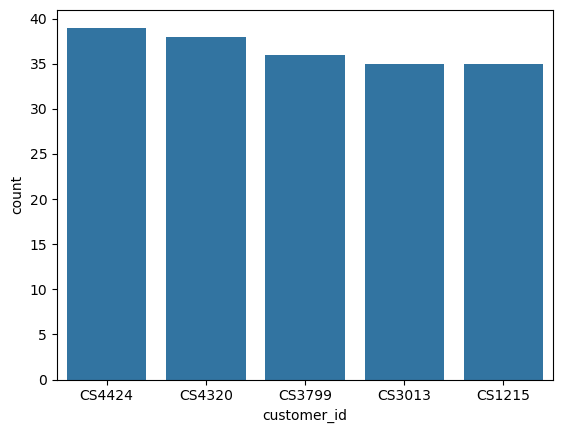

In [25]:
sns.barplot(x='customer_id',y='count',data=top_customers)

In [26]:
#top 5 customers having highest value of orders

order_amount = Retaildf.groupby('customer_id')['tran_amount'].sum().reset_index()
order_amount= order_amount.sort_values(by='tran_amount',ascending=False)
top_paying_customers = order_counts.head(5)
top_paying_customers

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

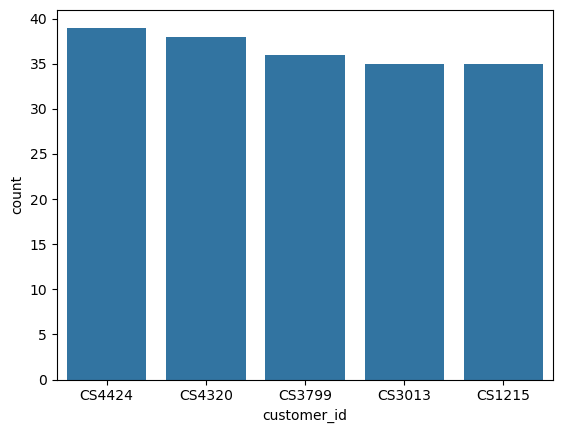

In [27]:
sns.barplot(x='customer_id',y='count',data=top_paying_customers)

Advanced Analysis:

In [28]:
#Time-Series Analysis

import matplotlib.dates as mdates

Retaildf['month_year']=Retaildf['trans_date'].dt.to_period('M')

monthly_sales = Retaildf.groupby('month_year')['tran_amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

C:\Users\Shivi\AppData\Local\Temp\ipykernel_27404\1225281686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Retaildf['month_year']=Retaildf['trans_date'].dt.to_period('M')


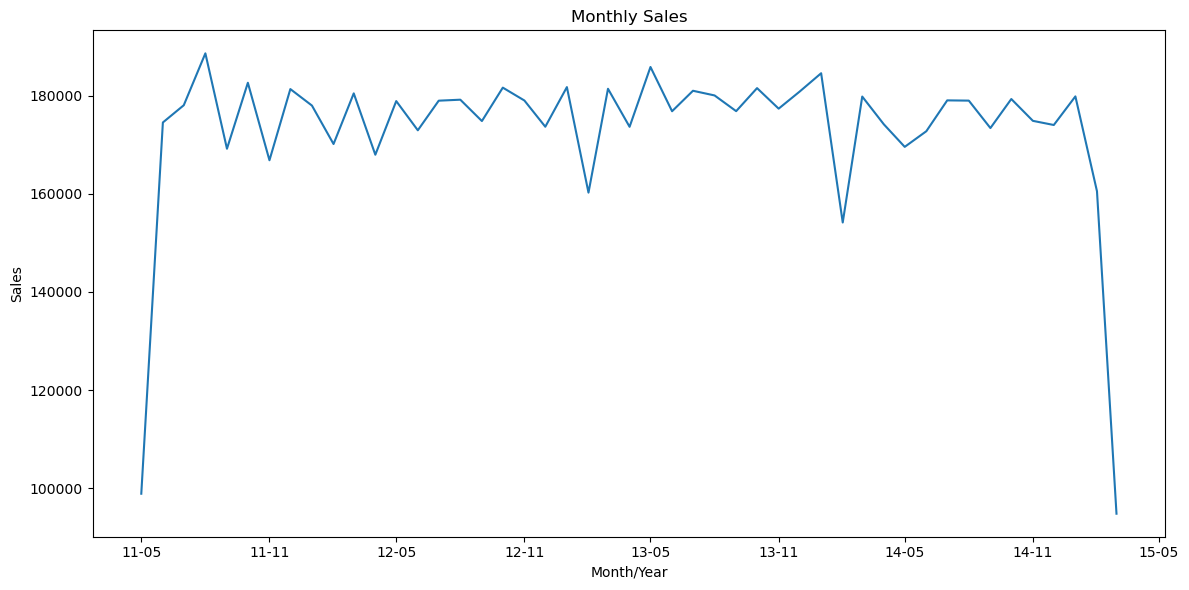

In [29]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month/Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.tight_layout()
plt.show()

In [32]:
#Cohort Segmentation

#recency
recency = Retaildf.groupby('customer_id')['trans_date'].max()

#frequency 
frequency = Retaildf.groupby('customer_id')['trans_date'].count()

#monetary
monetary = Retaildf.groupby('customer_id')['tran_amount'].sum()

#combine all
rfm = pd.DataFrame(
    {'recency':recency, 'frequency':frequency, 'monetary':monetary}
)
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [34]:
#customer segmentation

def customer_segment(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2012<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'

rfm['segment'] = rfm.apply(customer_segment,axis=1)
rfm

,recency,frequency,monetary,regment,segment
customer_id,,,,,
CS1112,2015-01-14,15,1012,P0,P0
CS1113,2015-02-09,20,1490,P0,P0
CS1114,2015-02-12,19,1432,P0,P0
CS1115,2015-03-05,22,1659,P0,P0
CS1116,2014-08-25,13,857,P2,P2
...,...,...,...,...,...
CS8996,2014-12-09,13,582,P2,P2
CS8997,2014-06-28,14,543,P2,P2
CS8998,2014-12-22,13,624,P2,P2


<Axes: xlabel='response'>

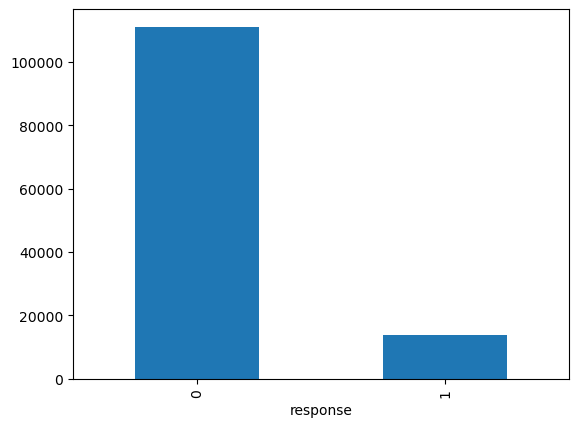

In [40]:
#Churn analysis

#count the no. of churned and active customers
churn_count = Retaildf['response'].value_counts()

#plot
churn_count.plot(kind='bar')

<Axes: xlabel='month_year'>

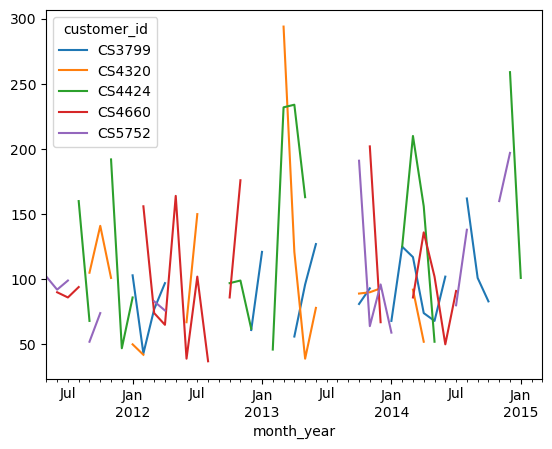

In [44]:
#Analyzing top customers

top_5_cust = monetary.sort_values(ascending=False).head(5).index

top_customers_df = Retaildf[Retaildf['customer_id'].isin(top_5_cust)]

top_customer_sales = top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [ ]:
#exporting data to csv

Retaildf.to_csv('')